<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch5_model_evaluation_and_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn==1.0.2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

## 5.1 교차 검증

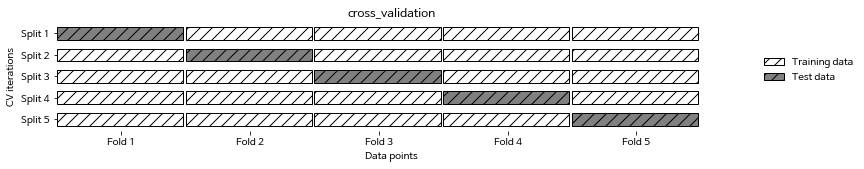

In [2]:
# 데이터를 여러 번 반복해 나누고 여러 모델을 학습

mglearn.plots.plot_cross_validation()

## 5.1.1 scikit-learn의 교차 검증

In [3]:
# iris 데이터 셋을 적용한 Logistic Regression 모델 평가하기

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
# cv 매개변수로 폴드의 수 바꾸기
scores = cross_val_score(logreg, iris.data, iris.target, cv = 10)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
# 교차 검증 평균 점수
print("교차 검증 평균 점수 : {:.2f}" .format(scores.mean()))

교차 검증 평균 점수 : 0.97


In [6]:
# cross_validate : 훈련과 테스트에 걸린 시간을 딕셔너리로 반환
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score = True)
res

{'fit_time': array([0.02726245, 0.03408003, 0.02147937, 0.0223453 , 0.02153468]),
 'score_time': array([0.00039434, 0.00039625, 0.00037861, 0.00036836, 0.00036097]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.027262,0.000394,0.966667,0.966667
1,0.034080,0.000396,1.000000,0.966667
2,0.021479,0.000379,0.933333,0.983333
3,0.022345,0.000368,0.966667,0.983333
4,0.021535,0.000361,1.000000,0.975000


## 5.1.2 교차 검증의 장점